<a href="https://colab.research.google.com/github/DavidSenseman/BIO5853/blob/master/Lesson_03_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 5853: Biostatistics**

##### **Module 3: Inference**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Integrative Biology](https://sciences.utsa.edu/integrative-biology/), [UTSA](https://www.utsa.edu/)


### Module 3 Material

* Part 3.1: Confidence Intervals
* **Part 3.2: Hypothesis Testing**
* Part 3.3: Comparison of Two Means
* Part 3.4: Analysis of Variance (ANOVA)
* Part 3.5: Nonparametric Methods
* Part 3.6: Inference on Proportions
* Part 3.7: Contingency Tables
* Part 3.8: Correlation
* Part 3.9: Simple Linear Regression
* Part 3.10: Multiple Linear Regression
* Part 3.11: Logistic Regression
* Part 3.12: Survival Analysis

## Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.
  Running the following code will map your GDrive to ```/content/drive```.

In [1]:
# YOU MUST RUN THIS CELL FIRST
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: not using Google CoLab


# **Part 3.2: Hypothesis Testing**

**_Hypothesis Testing_** is a statistical method used to make inferences or draw conclusions about a population based on sample data. It involves formulating a hypothesis, collecting data, and then determining whether the data supports or refutes the hypothesis.

#### **Key Concepts:**

1. **Null Hypothesis (H₀):** A statement that there is no effect or no difference. It serves as the default or starting assumption.
2. **Alternative Hypothesis (H₁ or Ha):** A statement that there is an effect or a difference. It is what you aim to support.
3. **Test Statistic:** A standardized value calculated from sample data, used to determine whether to reject the null hypothesis.
4. **P-Value:** The probability of obtaining test results at least as extreme as the observed results, assuming the null hypothesis is true. A low p-value (typically < 0.05) indicates strong evidence against the null hypothesis.
5. **Significance Level (α):** The threshold for rejecting the null hypothesis, commonly set at 0.05.
6. **Type I Error:** Incorrectly rejecting the null hypothesis when it is true (false positive).
7. **Type II Error:** Failing to reject the null hypothesis when it is false (false negative).


#### **Steps in Hypothesis Testing:**

1. **Formulate Hypotheses:** Define the null and alternative hypotheses.
2. **Choose a Significance Level:** Decide on the α level (e.g., 0.05).
3. **Collect Data:** Gather sample data relevant to the hypothesis.
4. **Calculate Test Statistic:** Compute the test statistic based on the sample data.
5. **Determine P-Value:** Find the p-value corresponding to the test statistic.
6. **Make a Decision:** Compare the p-value to the significance level and decide whether to reject or fail to reject the null hypothesis.

#### **Importance in Biostatistics:**
* **Medical Research:** Hypothesis testing is crucial in clinical trials to determine the efficacy of new treatments or drugs. For example, it helps in comparing the effectiveness of a new drug against a placebo.
* **Public Health:** It aids in identifying risk factors for diseases and evaluating the impact of public health interventions.
* **Epidemiology:** Used to test associations between exposures and health outcomes, such as the link between smoking and lung cancer.
* **Quality Control:** Ensures that medical devices and procedures meet safety and efficacy standards.
* **Decision Making:** Provides a systematic approach to making data-driven decisions in healthcare and policy.

**Example:**
Imagine a study testing whether a new drug lowers blood pressure more effectively than an existing drug. The null hypothesis (H₀) might state that there is no difference in blood pressure reduction between the two drugs. The alternative hypothesis (H₁) would state that the new drug is more effective. By collecting and analyzing sample data, researchers can use hypothesis testing to determine if there is enough evidence to support the new drug’s efficacy.

### **Introduction**

In our study of confidence intervals, we encountered the distribution of serum cholesterol levels for the population of males in the United States who are hypertensive and who smoke. This distribution is  approximately normal with unknown mean µ. However, we do know that the mean serum cholesterol level for the general population of all 20- to 74-year-old males in the United States is 211 mg/100 ml. Therefore, we might wonder whether the mean cholesterol level of the subpopulation of males who are hypertensive smokers is 211 mg/100 ml as well. 

If we select a random sample of size 25 from this subpopulation and the mean serum cholesterol level for the sample is $\bar{x}$ = 220 mg/100 ml, is this sample mean compatible with a hypothesized mean of 211 mg/100 ml? 

We know that some amount of sampling variability is to be expected. What if the sample mean is 230 mg/100 ml, or 250 mg/100 ml? How far from 211 must $\bar{x}$ be before we can conclude that µ is really equal to  some other value?

>(Pagano, Marcello; Gauvreau, Kimberlee; Mattie, Heather. Principles of Biostatistics (p. 227). CRC Press. Kindle Edition.) 

### Example 1: Read Numpy Array from File Server

The code in the cell below reads the file `serumChol.npy` from the course file server and saves the data as a Numpy array called `serumChol`. We will use this data later in the lesson.

In [2]:
# Read Numpy Array

import numpy as np
import requests

# URL of the .npy file on the file server
url = 'https://biologicslab.co/BIO5853/data/serumChol.npy'

# Download the file
response = requests.get(url)
response.raise_for_status()  # Check if the request was successful

# Save the file locally
with open('file.npy', 'wb') as f:
    f.write(response.content)

# Load the .npy file
serumChol = np.load('file.npy')

# Display the loaded array
print(serumChol)

[237.29487555 266.57316704 248.03208196 ... 267.39200266 154.25229919
 229.35340222]


If the code is correct, you should see the following output:

~~~text
[237.29487555 266.57316704 248.03208196 ... 267.39200266 154.25229919
 229.35340222]
~~~

### **Exercise 1: Read Numpy Array from File Server**

In the cell below write the code to read the file `plasmaAlum.npy` from the course file server and saves the data as a Numpy array called `plasmaAlum`. We will use this data later in the lesson.

In [3]:
# Insert your code for Exercise 1 here

import numpy as np
import requests

# URL of the .npy file on the file server
url = 'https://biologicslab.co/BIO5853/data/plasmaAlum.npy'

# Download the file
response = requests.get(url)
response.raise_for_status()  # Check if the request was successful

# Save the file locally
with open('file.npy', 'wb') as f:
    f.write(response.content)

# Load the .npy file
plasmaAlum = np.load('file.npy')

# Display the loaded array
print(plasmaAlum)

[-0.14434397  8.65259827  3.86298153 ... -5.73236469 10.73519635
  1.44983783]


If the code is correct, you should see the following output:

~~~text
[-0.14434397  8.65259827  3.86298153 ... -5.73236469 10.73519635
  1.44983783]
~~~

### **General Concepts**

The following **_hypothesis test_** is taken from page 227 in your textbook:

$$ H_0: µ = µ_0 = 211 mg/100 ml. $$

The symbol $H_0$ is called the **_null hypothesis_**. In this particular equation, the null hypothesis is claiming that the mean of the population $µ$ is equal to some postulated value $µ_0$ which is equal to 211 mg/100ml.

The example used in your textbook asks the question whether males who smoke and have hypertension, have the same serum cholesterol values as the general male population? 

We know that in the general US male population serum cholesterol has a mean value $µ$ = 211 mg/100ml with a standard deviation of 46 mg/100ml. The null hypothes $H_0:$ assumes that smoking and hypertension has **_no effect_** on serum cholesterol levels, so that blood samples from smoking males with hypertension will have the same mean value of 211 mg/100ml as the general male population.  

The problem arises when we try to test our hypothesis. If we measure the serum cholesterol level in a sample of blood from 25 males who smoke and have hypertension, we already know that it is highly unlikely that our sample mean $\bar{x}$ will be exactly 211 mg/100ml. Why?  Because of 'sampling error', or more colloquially, 'the luck of the draw'. As we saw in earlier lessons, every time we compute the mean of samples taken from a population, we get different values. That is "sampling error". 

The process of **_Hypothesis Testing_** can be used to answer the following question: 

>_How much can sampling error make the sample mean ($\bar{x}$) different from the population mean (µ) even if they are from the same population and therefore should have the same value?_

In other words, at what point is the difference either too big-or too small-that we can no longer reasonably assume that these two value are _not_the same? When must we assume that our sample mean represents some other value? 

When we reach that point we have the accept the **_alternative hypothesis_**, represented by $H_A$ that contradicts the null hypothesis, $H_0$ :

$$ H_A: µ \not= 211 mg/100 ml. $$

You should note that together, the null hypothesis $H_0$ and the alternative hypothesis $H_A$ represent **_all_** logical possibilites.

## **Two-Sided Tests of Hypothesis**

To conduct a test of hypothesis, we again draw on our knowledge of the sampling distribution of the  mean. Assume that the continuous random variable $X$ has mean $µ_0$ and known standard deviation $σ$. Thus, according to the central limit theorem,

$$ Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} $$

has an approximate standard normal distribution if the value of _n_ is sufficiently large. For a given  sample with mean $\bar{x}$, we can calculate the corresponding outcome of $Z$, called the test statistic. We can then use a computer program to determine the probability of obtaining a value of Z that is as extreme or more extreme than the one observed. By “more extreme,” we mean farther away from $µ_0$ in the direction of the alternative hypothesis. Because it relies on the standard normal distribution, a test of this kind is called a **_one-sample z-test_**.  

When the population standard deviation is not known, we substitute the sample value $s$ for $σ$. If the underlying population is normally distributed, the random variable  

$$ t = \frac{\bar{X} - \mu_0}{s / \sqrt{n}} $$

has a _t_ distribution with n − 1 degrees of freedom. In this case, we can calculate the outcome of _t_  corresponding to a given $\bar{x}$ and consult our computer program to find the probability of obtaining a sample mean that is more extreme than the one observed. This procedure is known as a **_one-sample t-test_**. 

(Pagano, Marcello; Gauvreau, Kimberlee; Mattie, Heather. Principles of Biostatistics (p. 230). CRC Press. Kindle Edition.) 


### Example 1: Hypothesis Testing: One-Sample Z-test

If you happen to know the standard deviation $σ$ of the sampling distribution of the mean, you should use the **_one-sample z-test_** for hypothesis testing using this equation:

$$ z = \frac{\bar{x} - \mu}{\sigma / \sqrt{n}} $$

The Python code for solving this equation is shown in the cell below.

In Example 1, we illustrate how to solve the textbook problem on pages 230-231 in your textbook:

>The previously mentioned random sample of 12 hypertensive smokers has mean serum cholesterol level $\bar{x}$ = 217 mg/100 ml. Is it likely that this sample comes from a population with mean 211 mg/100 ml?

_Code Description:_

We are using the Numpy array `serumChol`, downloaded previously in this lesson, as our population distribution of serum cholesterol values.

The code solves for `z` with the equation above using this code chunk:
~~~text
# Calculate the z-score
z_score = (sample_mean - population_mean)/(population_std/(np.sqrt(sample_size)))
~~~
The z score is then used to find the p-value:
~~~text
# Calculate the area to the right of the z-score
area_right = 1 - norm.cdf(z_score)

# Calculate the p-value
p_value = 2*area_right
~~~

In [4]:
# Example 1: Compute Z score

import numpy as np
from scipy.stats import norm

# Define alpha
alpha=0.05

# Sample data
sample_size = 12         # Sample size (n)
sample_mean = 217        # Sample mean (x̄)

# Calculate the population mean 
population_mean = np.mean(serumChol)

# Calculate the population standard deviation
population_std =  np.std(serumChol)

# Calculate the z-score
z_score = (sample_mean - population_mean)/(population_std/(np.sqrt(sample_size)))

# Calculate the area to the right of the z-score
area_right = 1 - norm.cdf(z_score)

# Calculate the p-value
p_value = 2*area_right

print("----Solving Hypothesis Test-----------------------------")
print(f"The population mean (µ) = {population_mean:.2f} mg/100ml.")
print(f"The population standard deviation (σ) = {population_std:.2f} mg/100ml.")
print(f"You are testing a sample mean (x\u0305) = {sample_mean:.2f} mg/100ml.")
print(f"The sample size = {sample_size}.")
print("----Results---------------------------------------------")
print(f"The z-score = {z_score:.2f}")
print(f"The area to the right = {area_right:.3f}")
print(f"The p-value = {p_value}")
print("----Interpretation--------------------------------------")
if p_value < alpha:
    print(f"Reject the null hypothesis!")
    print(f"The sample mean (x\u0305) is significantly different from µ.")
else:
    print(f"Failed to reject the null hypothesis.")
    print(f"The sample mean (x\u0305) is not significantly different from µ.")
print(" ")


----Solving Hypothesis Test-----------------------------
The population mean (µ) = 211.06 mg/100ml.
The population standard deviation (σ) = 46.05 mg/100ml.
You are testing a sample mean (x̅) = 217.00 mg/100ml.
The sample size = 12.
----Results---------------------------------------------
The z-score = 0.45
The area to the right = 0.327
The p-value = 0.6548271145555575
----Interpretation--------------------------------------
Failed to reject the null hypothesis.
The sample mean (x̅) is not significantly different from µ.
 


If the code is correct, you should see the following output:

~~~text
----Solving Hypothesis Test-----------------------------
The population mean (µ) = 211.06 mg/100ml.
The population standard deviation (σ) = 46.05 mg/100ml.
You are testing a sample mean (x̅) = 217.00 mg/100ml.
The sample size = 12.
----Results---------------------------------------------
The z-score = 0.45
The area to the right = 0.327
The p-value = 0.6548271145555575
----Interpretation--------------------------------------
Failed to reject the null hypothesis.
The sample mean (x̅) is not significantly different from µ.
~~~

The output exactly matches the solution derived in your textbook on page 231.

> Based on this sample, the evidence is not sufficient to conclude that the mean serum  cholesterol level of the population of hypertensive smokers is different from 211 mg/100 ml.  

### **Exercise 1A: Hypothesis Testing: One-Sample Z-test**

In the cell below, perform a one-sample Z-test for a sample mean (_n_=12) for serum cholesterol of 226 mg/100ml. 

In [5]:
# Insert your code for Exercise 1A here

import numpy as np
from scipy.stats import norm

# Define alpha
alpha=0.05

# Sample data
sample_size = 12         # Sample size (n)
sample_mean = 226        # Sample mean (x̄)

# Calculate the population mean 
population_mean = np.mean(serumChol)

# Calculate the population standard deviation
population_std =  np.std(serumChol)

# Calculate the z-score
z_score = (sample_mean - population_mean)/(population_std/(np.sqrt(sample_size)))

# Calculate the area to the right of the z-score
area_right = 1 - norm.cdf(z_score)

# Calculate the p-value
p_value = 2*area_right

print("----Solving Hypothesis Test-----------------------------")
print(f"The population mean (µ) = {population_mean:.2f} mg/100ml.")
print(f"The population standard deviation (σ) = {population_std:.2f} mg/100ml.")
print(f"You are testing a sample mean (x\u0305) = {sample_mean:.2f} mg/100ml.")
print(f"The sample size = {sample_size}.")
print("----Results---------------------------------------------")
print(f"The z-score = {z_score:.2f}")
print(f"The area to the right = {area_right:.3f}")
print(f"The p-value = {p_value}")
print("----Interpretation--------------------------------------")
if p_value < alpha:
    print(f"Reject the null hypothesis!")
    print(f"The sample mean (x\u0305) is significantly different from µ.")
else:
    print(f"Failed to reject the null hypothesis.")
    print(f"The sample mean (x\u0305) is not significantly different from µ.")
print(" ")


----Solving Hypothesis Test-----------------------------
The population mean (µ) = 211.06 mg/100ml.
The population standard deviation (σ) = 46.05 mg/100ml.
You are testing a sample mean (x̅) = 226.00 mg/100ml.
The sample size = 12.
----Results---------------------------------------------
The z-score = 1.12
The area to the right = 0.130
The p-value = 0.2609676294326917
----Interpretation--------------------------------------
Failed to reject the null hypothesis.
The sample mean (x̅) is not significantly different from µ.
 


If the code is correct, you should see the following output:

~~~text
----Solving Hypothesis Test-----------------------------
The population mean (µ) = 211.06 mg/100ml.
The population standard deviation (σ) = 46.05 mg/100ml.
You are testing a sample mean (x̅) = 226.00 mg/100ml.
The sample size = 12.
----Results---------------------------------------------
The z-score = 1.12
The area to the right = 0.130
The p-value = 0.2609676294326917
----Interpretation--------------------------------------
Failed to reject the null hypothesis.
The sample mean (x̅) is not significantly different from µ.
~~~

According to your Z-test, a sample mean of 226 mg/100ml, computed from 12 samples, is **_not_** significantly different from the population mean of 211 mg/100ml.

### **Exercise 1B: Hypothesis Testing: One-Sample Z-test**

In the cell below, repeat your one-sample Z-test for sample mean of 226 mg/100ml, but this time increase the sample size from 12 to 40. 

In [6]:
# Insert your code for Exercise 1B here

import numpy as np
from scipy.stats import norm

# Define alpha
alpha=0.05

# Sample data
sample_size = 40         # Sample size (n)
sample_mean = 226        # Sample mean (x̄)

# Calculate the population mean 
population_mean = np.mean(serumChol)

# Calculate the population standard deviation
population_std =  np.std(serumChol)

# Calculate the z-score
z_score = (sample_mean - population_mean)/(population_std/(np.sqrt(sample_size)))

# Calculate the area to the right of the z-score
area_right = 1 - norm.cdf(z_score)

# Calculate the p-value
p_value = 2*area_right

print("----Solving Hypothesis Test-----------------------------")
print(f"The population mean (µ) = {population_mean:.2f} mg/100ml.")
print(f"The population standard deviation (σ) = {population_std:.2f} mg/100ml.")
print(f"You are testing a sample mean (x\u0305) = {sample_mean:.2f} mg/100ml.")
print(f"The sample size = {sample_size}.")
print("----Results---------------------------------------------")
print(f"The z-score = {z_score:.2f}")
print(f"The area to the right = {area_right:.3f}")
print(f"The p-value = {p_value}")
print("----Interpretation--------------------------------------")
if p_value < alpha:
    print(f"Reject the null hypothesis!")
    print(f"The sample mean (x\u0305) is significantly different from µ.")
else:
    print(f"Failed to reject the null hypothesis.")
    print(f"The sample mean (x\u0305) is not significantly different from µ.")
print(" ")


----Solving Hypothesis Test-----------------------------
The population mean (µ) = 211.06 mg/100ml.
The population standard deviation (σ) = 46.05 mg/100ml.
You are testing a sample mean (x̅) = 226.00 mg/100ml.
The sample size = 40.
----Results---------------------------------------------
The z-score = 2.05
The area to the right = 0.020
The p-value = 0.040137676983151405
----Interpretation--------------------------------------
Reject the null hypothesis!
The sample mean (x̅) is significantly different from µ.
 


If the code is correct, you should see the following output:

~~~text
----Solving Hypothesis Test-----------------------------
The population mean (µ) = 211.06 mg/100ml.
The population standard deviation (σ) = 46.05 mg/100ml.
You are testing a sample mean (x̅) = 226.00 mg/100ml.
The sample size = 40.
----Results---------------------------------------------
The z-score = 2.05
The area to the right = 0.020
The p-value = 0.040137676983151405
----Interpretation--------------------------------------
Reject the null hypothesis!
The sample mean (x̅) is significantly different from µ.
~~~

This time, a sample mean of 226 mg/100ml, computed from **_40_** samples, is **_significantly different_** from the population mean of 211 mg/100ml. 

Why? 

Mathematically, as the sample size (_n_) increases the value of $\sqrt{n}$ increases:

$$ z = \frac{\bar{x} - \mu}{\sigma / \sqrt{n}} $$

making the z statistic _larger_. (Note that $\sqrt{n}$ is in a denominator of the equation's denominator).

As the value of the z-statistic grows, the _p_-value rapidly becomes smaller and smaller. 

Logically, this should make sense. Larger sample sizes reduce the standard error of the mean (SE) making the estimate of the sample mean more precise.


### Example 2: Hypothesis Testing: One-Sample t-test

As discussed above, performing a hypothesis test using Z-scores is permissible _only_ if you know the population's standard deviation, $\sigma$. Otherwise, you are forced to use the **_One-Sample t-test_** which substitutes the sample's standard deviation, _s_, for the population's standard deviation, $\sigma$.

In this example, we will use a one-sample _t_-test to test the null hypothesis

$$  H_0: µ = 4.13 µg/l. $$

and the alternative is

$$ H_A: µ \not= 4.13 µg/l. $$

This example shows how to use Python so work the example on page 232 in your textbook. The example reads as follows:

>    As a second example, consider the random sample of 10 children selected from the population of infants receiving antacids that contain aluminum. The underlying distribution of plasma aluminum levels for this population is approximately normal with an unknown mean $\mu$ and standard deviation $\sigma$. However, we do know that the mean plasma aluminum level for the sample of size 10 is $\bar{x}$ = 37.20 µg/l and that its standard deviation is $s$ = 7.13 µg/l. Furthermore, the mean plasma aluminum level for the population of infants not receiving antacids is 4.13 µg/l. Is it possible that the data in our sample could have come from a population with mean $\mu$ = 4.13 µg/l?

>   We are interested in deviations from the mean which could occur in either direction; we would want to know if $\mu$ is actually larger than 4.13 or if it is smaller. Therefore, we conduct a two-sided test at the α = 0.05 level of significance.  Because we do not know the population standard deviation $\sigma$, we use a one-sample t-test rather than a one-sample z-test.

_Code Description:_

The code basically uses the following equation to solve this problem:

$$ t = \frac{\bar{X} - \mu_0}{s / \sqrt{n}} $$

using the following code chunk:
~~~text
# Calculate t-statistic
t_statistic = (sample_mean - population_mean)/(sample_std/(np.sqrt(sample_size)))
~~~

The t-statistic is then used to find the _p_-value using the `stats.t.sf()` function:
~~~text
# Calculate the p-value for a two-tailed test
p_value = stats.t.sf(abs(t_statistic), df) * 2
~~~


In [7]:
# Example 2: Hypothesis Testing: One-Sample t-test

import numpy as np
import scipy.stats as stats

# Define alpha
alpha=0.05

# Sample data
sample_size = 10      # Sample size (n)
sample_mean = 37.20   # Sample mean (x̄)
sample_std = 7.13     # Sample standard deviation (s)
df = sample_size - 1  # Degrees of freedom

# Calculate the population mean 
population_mean = np.mean(plasmaAlum)

# Calculate t-statistic
t_statistic = (sample_mean - population_mean)/(sample_std/(np.sqrt(sample_size)))

# Calculate the p-value for a two-tailed test
p_value = stats.t.sf(abs(t_statistic), df) * 2

print("----Solving Hypothesis Test---------------------------------")
print(f"The population mean (µ\u2080) = {population_mean:.2f} µg/l.")
print(f"You are testing a sample mean (x\u0305) = {sample_mean:.2f} µg/l.")
print(f"The sample size = {sample_size}.")
print("----Results---------------------------------------------")
print(f"The t-statistic = {t_statistic:.2f}")
print(f"The degrees of freedom = {df}")
print(f"The p-value = {p_value}")
print("----Interpretation--------------------------------------")
if p_value < alpha:
    print(f"Reject the null hypothesis!")
    print(f"The sample mean (x\u0305) is significantly different from the population mean (µ\u2080).")
else:
    print(f"Failed to reject the null hypothesis.")
    print(f"The sample mean (x\u0305) is not significantly from the population mean (µ\u2080).")
print(" ")

----Solving Hypothesis Test---------------------------------
The population mean (µ₀) = 4.13 µg/l.
You are testing a sample mean (x̅) = 37.20 µg/l.
The sample size = 10.
----Results---------------------------------------------
The t-statistic = 14.67
The degrees of freedom = 9
The p-value = 1.3720393176933629e-07
----Interpretation--------------------------------------
Reject the null hypothesis!
The sample mean (x̅) is significantly different from the population mean (µ₀).
 


If the code is correct, you should see the following output:

~~~text
----Solving Hypothesis Test---------------------------------
The population mean (µ₀) = 4.13 µg/l.
You are testing a sample mean (x̅) = 37.20 µg/l.
The sample size = 10.
----Results---------------------------------------------
The t-statistic = 14.67
The degrees of freedom = 9
The p-value = 1.3720393176933629e-07
----Interpretation--------------------------------------
Reject the null hypothesis!
The sample mean (x̅) is significantly different from the population mean (µ₀).
~~~

The results shown in the output match the results presented in your textbook on page 232. 

The _p_-value is **very** small. To convert this to a standard decimal form, you would move the decimal point 7 places to the left:

$$ p-value = 0.00000013720393176933629 $$

In other words, the probability that you could have gotten a sample mean for plasma aluminum due to "sampling error" is extremely unlikely. 

Therefore, we reject the null hypothesis:

$$  H_0: µ = 4.13 µg/l. $$

and therefore we must accept the alternative hypothesis:

$$ H_A: µ \not= 4.13 µg/l. $$

This sample of infants provides evidence that the mean plasma aluminum level of children receiving antacids is not equal to the mean aluminum level of children who do not receive them. In fact, since  the sample mean $\bar{x}$ is larger than $µ_0$, the true mean aluminum level is higher than 4.13 µg/l.

(Pagano, Marcello; Gauvreau, Kimberlee; Mattie, Heather. Principles of Biostatistics (p. 232). CRC Press. Kindle Edition.) 

### **Exercise 2A: Hypothesis Testing: One-Sample t-test**

Aluminum is commonly used in antacids in the form of aluminum hydroxide. This compound works by neutralizing stomach acid, which helps to relieve symptoms of heartburn, acid indigestion, and upset stomach. When aluminum hydroxide reacts with stomach acid, it forms aluminum chloride and water, which increases the pH of the stomach contents, making it less acidic.

Suppose you obtain a sample from 12 infants who received antacids containing aluminum from a different pharmaceutical company that used aluminum carbonate instead of aluminum hydroxide. The mean plasma aluminum concerntration in these 12 infants was 8.5 µg/l. 

In the cell below, test the following hypotheses concerning the plasma concentration of aluminum in these infants:

$$  H_0: µ = 4.13 µg/l. $$

and the alternative hypothesis:

$$ H_A: µ \not= 4.13 µg/l. $$


In [8]:
# Insert your code for Exercise 2A here

import numpy as np
import scipy.stats as stats

# Define alpha
alpha=0.05

# Sample data
sample_size = 12      # Sample size (n)
sample_mean = 8.5     # Sample mean (x̄)
sample_std = 7.13     # Sample standard deviation (s)
df = sample_size - 1  # Degrees of freedom

# Calculate the population mean 
population_mean = np.mean(plasmaAlum)

# Calculate t-statistic
t_statistic = (sample_mean - population_mean)/(sample_std/(np.sqrt(sample_size)))

# Calculate the p-value for a two-tailed test
p_value = stats.t.sf(abs(t_statistic), df) * 2

print("----Solving Hypothesis Test---------------------------------")
print(f"The population mean (µ\u2080) = {population_mean:.2f} µg/l.")
print(f"You are testing a sample mean (x\u0305) = {sample_mean:.2f} µg/l.")
print(f"The sample size = {sample_size}.")
print("----Results---------------------------------------------")
print(f"The t-statistic = {t_statistic:.2f}")
print(f"The degrees of freedom = {df}")
print(f"The p-value = {p_value}")
print("----Interpretation--------------------------------------")
if p_value < alpha:
    print(f"Reject the null hypothesis!")
    print(f"The sample mean (x\u0305) is significantly different from the population mean (µ\u2080).")
else:
    print(f"Failed to reject the null hypothesis.")
    print(f"The sample mean (x\u0305) is not significantly from the population mean (µ\u2080).")
print(" ")

----Solving Hypothesis Test---------------------------------
The population mean (µ₀) = 4.13 µg/l.
You are testing a sample mean (x̅) = 8.50 µg/l.
The sample size = 12.
----Results---------------------------------------------
The t-statistic = 2.12
The degrees of freedom = 11
The p-value = 0.05743990643816894
----Interpretation--------------------------------------
Failed to reject the null hypothesis.
The sample mean (x̅) is not significantly from the population mean (µ₀).
 


If the code is correct, you should see the following output:

~~~text
----Solving Hypothesis Test---------------------------------
The population mean (µ₀) = 4.13 µg/l.
You are testing a sample mean (x̅) = 8.50 µg/l.
The sample size = 12.
----Results---------------------------------------------
The t-statistic = 2.12
The degrees of freedom = 11
The p-value = 0.05743990643816894
----Interpretation--------------------------------------
Failed to reject the null hypothesis.
The sample mean (x̅) is not significantly from the population mean (µ₀).
~~~

The results shown in the output show that the _p_-value value (0.05744) is slightly larger than our value for alpha (0.05000) . 

In other words, the probability that you could have gotten a sample mean for plasma aluminum due to "sampling error" is not likely, but it could happen. 

Therefore, we **_fail_** to reject the null hypothesis:

$$  H_0: µ = 4.13 µg/l. $$


### **Exercise 2B: Hypothesis Testing: One-Sample t-test**

Suppose you decide to obtain a larger sample of infants who received antacids containing aluminum from a different pharmaceutical company that used aluminum carbonate instead of aluminum hydroxide. You measure the plasma from 20 infants and determine the mean plasma aluminum concerntration was 7.8 µg/l. 

In the cell below, repeat your hypothesis testing concerning the plasma concentration of aluminum in this new sample of 20 infants:

$$  H_0: µ = 4.13 µg/l. $$

and the alternative hypothesis:

$$ H_A: µ \not= 4.13 µg/l. $$


In [9]:
# Insert your code for Exercise 2A here

import numpy as np
import scipy.stats as stats

# Define alpha
alpha=0.05

# Sample data
sample_size = 20      # Sample size (n)
sample_mean = 7.8     # Sample mean (x̄)
sample_std = 7.13     # Sample standard deviation (s)
df = sample_size - 1  # Degrees of freedom

# Calculate the population mean 
population_mean = np.mean(plasmaAlum)

# Calculate t-statistic
t_statistic = (sample_mean - population_mean)/(sample_std/(np.sqrt(sample_size)))

# Calculate the p-value for a two-tailed test
p_value = stats.t.sf(abs(t_statistic), df) * 2

print("----Solving Hypothesis Test---------------------------------")
print(f"The population mean (µ\u2080) = {population_mean:.2f} µg/l.")
print(f"You are testing a sample mean (x\u0305) = {sample_mean:.2f} µg/l.")
print(f"The sample size = {sample_size}.")
print("----Results---------------------------------------------")
print(f"The t-statistic = {t_statistic:.2f}")
print(f"The degrees of freedom = {df}")
print(f"The p-value = {p_value}")
print("----Interpretation--------------------------------------")
if p_value < alpha:
    print(f"Reject the null hypothesis!")
    print(f"The sample mean (x\u0305) is significantly different from the population mean (µ\u2080).")
else:
    print(f"Failed to reject the null hypothesis.")
    print(f"The sample mean (x\u0305) is not significantly from the population mean (µ\u2080).")
print(" ")

----Solving Hypothesis Test---------------------------------
The population mean (µ₀) = 4.13 µg/l.
You are testing a sample mean (x̅) = 7.80 µg/l.
The sample size = 20.
----Results---------------------------------------------
The t-statistic = 2.30
The degrees of freedom = 19
The p-value = 0.03298416961587437
----Interpretation--------------------------------------
Reject the null hypothesis!
The sample mean (x̅) is significantly different from the population mean (µ₀).
 


If the code is correct, you should see the following output:

~~~text
----Solving Hypothesis Test---------------------------------
The population mean (µ₀) = 4.13 µg/l.
You are testing a sample mean (x̅) = 7.80 µg/l.
The sample size = 20.
----Results---------------------------------------------
The t-statistic = 2.30
The degrees of freedom = 19
The p-value = 0.03298416961587437
----Interpretation--------------------------------------
Reject the null hypothesis!
The sample mean (x̅) is significantly different from the population mean (µ₀).
~~~

The results shown in the output show that the _p_-value value (0.03298) is slightly less than our value for alpha (0.05000) . 

In other words, the probability that you could have gotten a sample mean for plasma aluminum due to "sampling error" is now considered to be unlikely enough that we can reject the null hypothesis:

$$  H_0: µ = 4.13 µg/l. $$

and must except the alternative hypothesis:

$$ H_A: µ \not= 4.13 µg/l. $$

#### **What You Should Conclude**

1. **Sample Size Can Be Extremely Important:** Even thought the mean plasma aluminum concentration of the larger sample (7.80 µg/l, _n_=20) was closer to the "true" mean (4.13), the hypothesis test found a significance difference, whereas the higher value in the smaller sample  (8.5 µg/l, _n_=12) was not found to be significantly different.
2. **_p_-values Are Everything?:** The magic words _statistically significant_ hinges on the _p_-value. If the _p_-value is less than 0.05, you can publish your results otherwise all of your hard work is "useless". Rarely do scientific journals publish results that are not "statistically significant". But please read the next section about the **_Misuse of the p-values_**. 

--------------------------------------

#### **The Misuse of _p_-values**

Unfortunately, _p_-values are commonly misused and misinterpreted in practice. A _p_-value is a measure of the strength of the evidence against the null hypothesis, with smaller _p_-values indicating stronger evidence against $H_0$. Because it is a probability, a _p_-value is continuous. Even though it is customary to report whether results are statistically significant or not, we must take care not to rely exclusively on a rigid division of study conclusions into two distinct boxes. In response to what many consider to be an over-simplification when reporting results, the American Statistical Association released a statement on statistical significance and _p_-values which clarifies several important points about what _p_-values can and cannot do in practice.  
1. _P_-values can indicate how incompatible the data are with a specified statistical model.
2. _P_-values do not measure the probability that the studied hypothesis is true, or the probability that the data were produced by random chance alone.
3. Scientific conclusions and business or policy decisions should not be based only on whether a _p_-value passes a specific threshold.
4. Proper inference requires full reporting and transparency.
5. A _p_-value, or statistical significance, does not measure the size of an effect or the importance of a result.
6. By itself, a _p_-value does not provide a good measure of evidence regarding a model or hypothesis. 

(Pagano, Marcello; Gauvreau, Kimberlee; Mattie, Heather. Principles of Biostatistics (p. 229). CRC Press. Kindle Edition.) 

---------------------------------------

**Summary of One-Sample, Two-sided Hypothesis Tests for the Mean**

Here is table from page 232 in your textbook that summarizes one-sample, two-sided hypothesis tests for the mean.
![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_2_image02.png)

## **Types of Error**

In hypothesis testing, there are two main types of statistical errors:

1. **Type I Error (False Positive):**
* **Definition:** Occurs when the null hypothesis $(H_0):$ is true, but we incorrectly reject it.
* **Example:** Concluding that a new drug is effective when it actually has no effect.
* **Probability:** Denoted by alpha $(\alpha)$, which is the significance level of the test. For example, if $\alpha = 0.05$, there is a 5% chance of making a Type I error.
2. **Type II Error (False Negative):**
* **Definition:** Occurs when the null hypothesis $(H_0):$ is false, but we fail to reject it.
* **Example:** Concluding that a new drug is not effective when it actually is.
* **Probability:** Denoted by beta $(\beta)$. The power of a test $1 - (\beta)$ is the probability of correctly rejecting a false null hypothesis.

These errors are inversely related; reducing the probability of one increases the probability of the other.


### **Hypothesis Testing with Z-test**

In the next example we see how to use Python to solve the problem in your textbook starting on page 235.

>Consider the case of a drug that has been deemed effective for reducing high blood pressure. After being treated with this drug for a given period of time, a population of individuals suffering from hypertension has mean diastolic blood pressure µd, a value that is clinically lower than the  mean diastolic blood pressure of the untreated hypertensives. Now suppose that another company produces a generic version of the same drug. We would like to know whether the generic drug is as effective at reducing high blood pressure as the brand name version.
>
>To determine this, we examine  the distribution of diastolic blood pressures for a sample of individuals who have been treated with the generic drug; if µ is the mean of this population, we use the sample to test the null hypothesis

$$ H_0: µ = µ_d. $$

>What if the manufacturer of the generic drug actually submits the brand name product for testing  in place of its own version? Vitarine Pharmaceuticals, a New York based drug company, reportedly did just that. In a situation such as this, we know that the null hypothesis must be true; we are testing the drug that itself set the standard. Therefore, if the test of hypothesis leads us to reject $H_0$ and pronounce the “generic” drug to be either more or less efficacious than the brand name version, a type I error has been made.
>
>The second kind of error that can be committed during a hypothesis test is a _type II error_, also known as an _acceptance error_, or a $\beta$ error. A type II error is made if we fail to reject the null hypothesis
>
$$ H0_: µ = µ_0 $$ 

>when $H_0$ is false. The probability of committing a type II error is represented by the Greek letter $\beta$, where
>
$$ \beta = P(\text{do not reject } H_0 \mid H_0 \text{ is false}) $$ 

If $\beta$ = 0.10, for instance, then the probability that we do not reject the null hypothesis

![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_2_image01A.png)


### Example 4: One-sided Hypothesis Test

On page 235, your text poses the following problem:
>Recall the distribution of serum cholesterol levels for all 20- to 74-year-old males in the United States. The mean of this population is $\mu$ = 211 mg/100 ml, and the standard deviation is $\sigma$ =  46 mg/100 ml. Suppose that we do not know the true mean of this population; however, we do know that the mean serum cholesterol level for the subpopulation of 20- to 24-year-old males is 180 mg/100 ml. Since older men tend to have higher cholesterol levels than do younger men on average, we would expect the mean cholesterol level of the population of 20- to 74-year-olds to be higher than 180 mg/100 ml. (And indeed it is, although we are pretending not to know this.) Therefore, if  we were to conduct a one-sided test of the null hypothesis

$$ H_0: \mu \leq 180\ \text{mg}/100\ \text{ml} $$  

>against the alternative hypothesis  

$$ H_A: \mu > 180\ \text{mg}/100 \ \text{ml}, $$

>we would expect $H_0$ to be rejected. It is possible, however, that it would not be. The probability of  reaching this incorrect conclusion – a type II error – is $\beta$. 

>What is the value of $\beta$ associated with a test of the null hypothesis  $H_0$: $\mu$ ≤ 180 mg/100 ml, assuming that we select a sample of size 25? To determine this, we first find the mean serum cholesterol level our sample must have in order for $H_0$ to be rejected. Since we are conducting a **_one-sided test_** at the $\alpha$ = 0.05 level of significance, $H_0$ would be rejected for z ≥ 1.645; this is the critical value of the test. Writing out the test statistic

$$ z_{crit} = \frac{\bar{x} - \mu_0}{\sigma / \sqrt{n}} $$

>solving for $\bar{x}$ we get the following:

$$ \bar{x} =  \mu_0 +  \frac{z_{crit} \sigma}{ \sqrt{n}} = 195.1 $$

Let's see how we can solve for $\bar{x}$ using Python. Here is the code chunk that performs this calculation:

~~~text
# Compute X bar
Xbar = subpop_mean + (Z_crit * population_std)/np.sqrt(sample_size)
~~~

In [10]:
# Example 4: Compute xbar

import numpy as np
from scipy.stats import norm

# Define alpha
alpha=0.05

# Define values
Z_crit = 1.645           # One-sided Z critical
sample_size = 25         # Sample size (n)
subpop_mean = 180        # Sample mean (x̄)

# Compute population standard deviation
population_std = np.std(serumChol)  # Population standard deviation

# Compute X bar
Xbar = subpop_mean + (Z_crit * population_std)/np.sqrt(sample_size)

print("----Calculate x\u0305---------------------------------")
print(f"x\u0305 = {Xbar:.2f} mg/100ml.")
print(" ")


----Calculate x̅---------------------------------
x̅ = 195.15 mg/100ml.
 


If the code is correct, you should see the following output:

~~~text
----Calculate x̅---------------------------------
x̅ = 195.15 mg/100ml.
~~~

The value for $\bar{x}$ of `195.15` is essentially the same as `195.1` given in your textbook as the solution to this problem. 

What `195.1` represents is the _minimum_ serum cholesterol value that any sample mean $\bar{x}$ of size 25 must **_exceed_** in order for us to reject the null hypothesis ($H_0$):

$$ H_0: \mu \leq 180\ \text{mg}/100\ \text{ml} $$  

However, our sample mean $\bar{x}$ = 180 mg/100 ml is clearly less than 195.1, so we have insufficient evidence to reject $H_0$. 

We can visualize this if we plot the value of `195.1` on a sampling distribution of the means, we will created in Example 5.

### **Exercise 4: One-sided Hypothesis Test**

Suppose you obtained serum cholesterol levels from a sample of 25 world class ultramarthon runners with a mean value of 160 mg/100 ml. You would like to know if being an ultramarathon runner **_lowers_** your serum cholesterol compared to the normal population of 20- to 24-year-old males whose mean cholesterol level is 180 mg/100 ml. In the cell below, you are to perform the following hypothesis tests:

$$ H_0: \mu \geq 180\ \text{mg}/100\ \text{ml} $$  

against the alternative hypothesis  

$$ H_A: \mu < 180\ \text{mg}/100 \ \text{ml}, $$

**HINT:** This is really the same problem as was demonstrated in Example 4. However, this time you need to find $\bar{x}$ for the _lower limit_ of the distribution. 

In [17]:
# Insert your code for Exercise 4 here

import numpy as np
from scipy.stats import norm

# Define alpha
alpha=0.05

# Define values
Z_crit = -1.645          # One-sided Z critical
sample_size = 25         # Sample size (n)
subpop_mean = 180        # Sample mean (x̄)

# Compute population standard deviation
population_std = np.std(serumChol)  # Population standard deviation

# Compute X bar
Xbar = subpop_mean + (Z_crit * population_std)/np.sqrt(sample_size)

print("----Calculate x\u0305---------------------------------")
print(f"x\u0305 = {Xbar:.2f} mg/100ml.")
print(" ")


----Calculate x̅---------------------------------
x̅ = 164.85 mg/100ml.
 


If your code is correct, you should see the following output:

~~~text
----Calculate x̅---------------------------------
x̅ = 164.85 mg/100ml.
~~~

The value for $\bar{x}$ of `164.85`. Since our ultramarathoners had a mean serum cholesterol level of 160 mg/100 ml, you should **_reject_** the null hypothesis ($H_0$) and accept the alternative hypothesis ($H_A$)

$$ H_A: \mu < 180\ \text{mg}/100 \ \text{ml}, $$

NOTE: You will be asked to generate a plot of this result in **Exercise 5**.

### Example 5: Plot Distribution of Means of Samples

In the previous example (Example 4), we failed to reject the null hypothesis: 

$$ H_0: \mu \geq 180\ \text{mg}/100\ \text{ml} $$  

since our sample mean $\bar{x}$ = 180 mg/100 ml was less than the 95% critical value of `195.1` mg/100ml.

The "trick" used in Example 4 was to recognize that the probability of reaching an incorrect conclusion -- a type II error is $\beta$. Since we are conducting a one-sided test (we only expect $\mu$ ≤ 180 mg/100) we can use our computer to figure out that the critical z-value to ≥ 1.645. 

As shown in **Figure 10.1**, the area to the right of $\bar{x}$ = 195.1 corresponds to the upper 5% of the sampling distribution of means of samples of size 25 when $\mu$ = 180. Therefore, the null hypothesis $H_0$ would only be rejected if our sample mean $\bar{x}$ was greater than 195.1 mg/100 ml.

In your textbook, this result was visualized in **Figure 10.1**

![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_2_image03.png)

**FIGURE 10.1**  Distribution of means of samples of size 25 for the serum cholesterol levels of males 20 to 74 years of age, $\mu$ = 180 mg/100 ml.

In this example we will recreate this plot using Python. 

_Code Description:_

The code for plotting the distribution of means was previously presented in Lesson_02_2, Example 8. 

We know from the **_Central Limit Theorem (CLT)_**, that _any_ distribution of sample means must be approximately normal, even if the distribution being sampled is not normal (see Lesson_02_3). Therefore, if we need to create a "distribution of means of samples" we can simply generate one using the `scipy.stats` function `y_dat = norm.pdf(x_dat, mu, sd)`. 

As was demonstated in Lesson_02_2, Example 8, you need to define the lower value (`low_val`) and the upper value (`high_val`) of the area you want to be shaded (colored). 

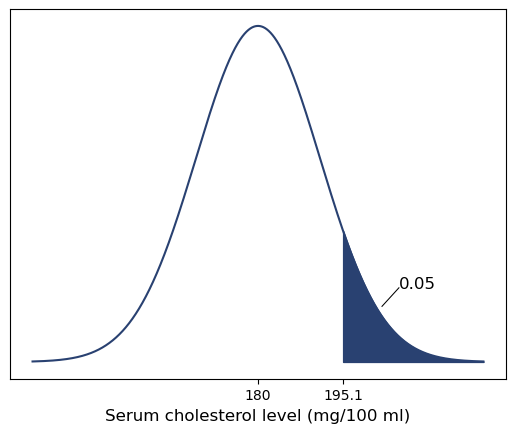

In [20]:
# Example 5: Plot Distribution of Means of Samples

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm      # normal distribution 

# Define parameters for the normal distribution
mu = 180     # mean
sd = 11      # standard deviation

# Define limits of the area to be colored
low_val = 195.1
high_val = 220

# Define chart color
chart_color='#294171'

# Generate x-values between 140 and 220 with .01 steps. 
x_dat = np.arange(140, 220, 0.01) 

# Compute y-value for each x-value 
y_dat = norm.pdf(x_dat, mu, sd)

# Create plot environment
fig, ax = plt.subplots()

# Plot normal distribution
ax.plot(x_dat, y_dat , chart_color)  

# Label plot
plt.xlabel('Serum cholesterol level (mg/100 ml)', fontsize='12')   # X-axis
plt.ylabel('', fontsize='12')   # Y-axis

# Fill the area under the curve between lower and upper limits
shade_x = np.linspace(low_val, high_val, 100)  # set x area
shade_y = norm.pdf(shade_x, mu, sd)            # set y area
plt.fill_between(shade_x, shade_y, color=chart_color, alpha=1.0)  # fill areas

# Ensure y-axis is not visible
plt.gca().yaxis.set_visible(False)

# Specify x-ticks
ax.set_xticks([180, 195.1])
ax.set_xticklabels(['180', '195.1'])

# Plot text
plt.text(205, 0.008, '0.05', fontsize=12)   # mu at bottom

# Plot line
x_line=[205, 202]
y_line=[0.008, 0.006]
plt.plot(x_line, y_line, color='k', linestyle='solid', linewidth=0.75)

# Show plot
plt.show()

If the code is correct, you should see the following plot:

![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_2_image04.png)

### **Exercise 5: Plot Distribution of Means of Samples**

For **Exercise 5** you are to plot the distribution of means of samples for your results in **Exercise 4**. In other words, your plot should look exactly like the output above, except that the lower 5% tail will be colored instead of the upper 5%.

**NOTE:** In order to make your plot look correct (see example below) you will need to "fiddle" with the values for positioning the text and the line that connects the text to the graph.

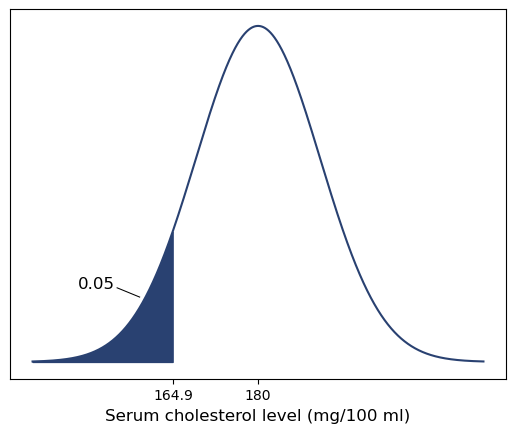

In [13]:
# Insert your code for Exercise 5 here

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm      # normal distribution 

# Define parameters for the normal distribution
mu = 180        # mean
sd = 11         # standard deviation

# Define limits of the area to be colored
low_val = 140
high_val = 164.85

# Define chart color
chart_color='#294171'

# Generate x-values between 140 and 220 with .01 steps. 
x_dat = np.arange(140, 220, 0.01) 

# Compute y-value for each x-value 
y_dat = norm.pdf(x_dat, mu, sd)

# Create plot environment
fig, ax = plt.subplots()

# Plot normal distribution
ax.plot(x_dat, y_dat , chart_color)  

# Label plot
plt.xlabel('Serum cholesterol level (mg/100 ml)', fontsize='12')   # X-axis
plt.ylabel('', fontsize='12')   # Y-axis

# Fill the area under the curve between lower and upper limits
shade_x = np.linspace(low_val, high_val, 100)  # set x area
shade_y = norm.pdf(shade_x, mu, sd)            # set y area
plt.fill_between(shade_x, shade_y, color=chart_color, alpha=1.0)  # fill areas

# Ensure y-axis is not visible
plt.gca().yaxis.set_visible(False)

# Specify x-ticks
ax.set_xticks([180, 164.9])
ax.set_xticklabels(['180', '164.9'])

# Plot text
plt.text(148, 0.008, '0.05', fontsize=12)   # mu at bottom

# Plot line
x_line=[155, 159.0]
y_line=[0.008, 0.007]
plt.plot(x_line, y_line, color='k', linestyle='solid', linewidth=0.75)

# Show plot
plt.show()

If your code is correct, you should see the following plot:

![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_2_image05.png)

It will take some "fiddling" with the code to make your plot look just like this. 

#### **Dual Plots Distribution of Means of Samples**

Recall that the probability of making a type II error, $\beta$, is the probability of not rejecting the null  hypothesis given that $H_0$ is false. Therefore, it is the chance of obtaining a sample mean which is less  than 195.1 mg/100 ml given that the true population mean is not 180 but is instead $\mu_1$ = 211 mg/100 ml. To find the value of $\beta$, we again consider the sampling distribution of means of samples of size 25; this time, however, we let $\mu$ = 211. This distribution is pictured on the right side of **Figure 10.2**. Since a sample mean less than $\bar{x}$ = 195.1 mg/100 ml implies that we do not reject $H_0$, we would  like to know what proportion of this new distribution centered at 211 mg/100 ml lies below 195.1.  

Observe that  

$$ z = \frac{195.1 - 211.0}{46/\sqrt{25}} = -1.73 $$ 

The area under the standard normal curve that lies to the left of $z = −1.73$ is `0.042`. Therefore, $\beta$ – the probability of failing to reject  

$$ H_0: \mu \leq 180 \text{ mg}/100 \text{ ml} $$ 

when the true population mean is $µ_1$ = 211 mg/100 ml – is equal to `0.042`. 

Whereas $\alpha$, the probability of committing a type I error, is determined by looking at the situation in which $H_0$ is true and µ is equal to $µ_0$, $\beta$ is found when $H_0$ is false and $\mu$ does not equal $\mu_0$. If $\mu$ is not equal to $µ_0$, however, there are an infinite number of possible values that $\mu$ could assume. The type II error is calculated for a single such value, $\mu_1$; in the previous example, $\mu_1$ was chosen to be 211 mg/100 ml. (We selected 211 because in this unusual example, we knew it to be the true population mean.) If we had chosen a different alternative population mean, then we would have computed a different value for $\beta$. The closer $\mu_1$ is to $\mu_0$, the more difficult it is to reject the null hypothesis and the higher $\beta$ will be. 

![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_2_image07.png)

**FIGURE 10.2** Distributions of means of samples of size 25 for the serum cholesterol levels of males 20 to 74 years of age, µ = 180 mg/100 ml versus µ = 211 mg/100 ml 

### Example 6: Dual Plot Distribution of Means of Samples

The code in the cell below shows how to use Python to recreate **Figure 10.2**. 

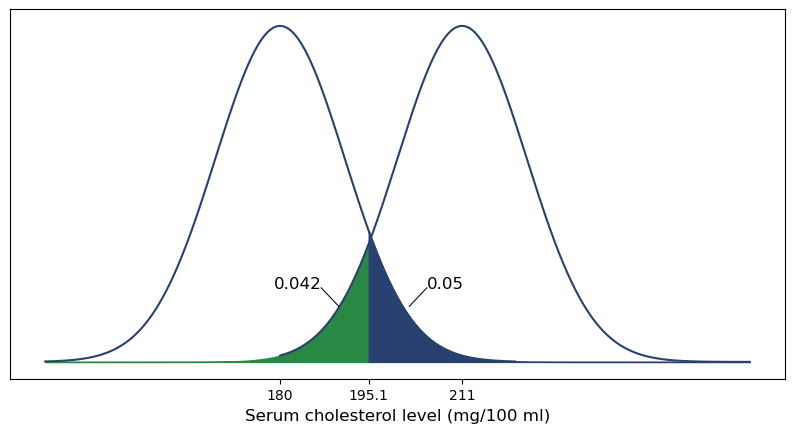

In [21]:
# Example 6: Dual Plot Distribution of Means of Samples

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm      # normal distribution 

# Define parameters for the normal distribution
mu_1 = 180        # mean
mu_2 = 211
sd = 11          # standard deviation

# Define limits of the area to be colored
low_val_1 = 195.1
high_val_1 = 260

low_val_2 = 140
high_val_2 = 195.1

# Define chart color
chart_color='#294171'
fill_color_1 = chart_color
fill_color_2 = '#298844'

# Generate x-values between 140 and 220 with .01 steps. 
x_dat_1 = np.arange(140, 220, 0.01) 
x_dat_2 = np.arange(180, 260, 0.01) 

# Compute y-value for each x-value 
y_dat_1 = norm.pdf(x_dat_1, mu_1, sd)
y_dat_2 = norm.pdf(x_dat_2, mu_2, sd)

# Create plot environment
fig, ax = plt.subplots()
fig.set_figwidth(10)  # Width is 12 inches

# Plot normal distribution
ax.plot(x_dat_1, y_dat_1, chart_color)
ax.plot(x_dat_2, y_dat_2, chart_color)

# Label plot
plt.xlabel('Serum cholesterol level (mg/100 ml)', fontsize='12')   # X-axis
plt.ylabel('', fontsize='12')   # Y-axis

# Fill the left area under the curve between lower and upper limits
shade_x = np.linspace(low_val_2, high_val_2, 100)  # set x area
shade_y = norm.pdf(shade_x, mu_2, sd)            # set y area
plt.fill_between(shade_x, shade_y, color=fill_color_2, alpha=1.0)  # fill areas

# Fill the right area under the curve between lower and upper limits
shade_x = np.linspace(low_val_1, high_val_1, 100)  # set x area
shade_y = norm.pdf(shade_x, mu_1, sd)            # set y area
plt.fill_between(shade_x, shade_y, color=fill_color_1, alpha=1.0)  # fill areas

# Ensure y-axis is not visible
plt.gca().yaxis.set_visible(False)

# Specify x-ticks
ax.set_xticks([180, 195.1, 211])
ax.set_xticklabels(['180', '195.1', '211'])

# Plot text
plt.text(179, 0.008, '0.042', fontsize=12)   # text left
plt.text(205, 0.008, '0.05', fontsize=12)    # text right

# Plot line left
x_line=[187, 190]
y_line=[0.008, 0.006]
plt.plot(x_line, y_line, color='k', linestyle='solid', linewidth=0.75)

# Plot line Right
x_line=[205, 202]
y_line=[0.008, 0.006]
plt.plot(x_line, y_line, color='k', linestyle='solid', linewidth=0.75)

# Show plot
plt.show()

Investigators generally try to design tests of hypotheses so that they have high power. It is not enough to know that we have a small probability of rejecting $H_0$ when it is true; we would also like there to be a large probability of rejecting the null hypothesis when it is false. In most practical applications, a power less than 80% is considered insufficient. 

One way to increase the power of a test is to raise the significance level α. If we increase $\alpha$, then we cut off a smaller portion of the tail of the sampling distribution centered at $µ_1$. Correspondingly, $\beta$ becomes smaller, and the power, 1 − $\beta$, increases. If α had been equal to `0.10` for the test of the null hypothesis

$$ H_0: \mu \leq 180 \text{ mg}/100 \text{ ml} $$ 

for instance, then $\beta$ would have been `0.018` and the power `0.982`. This situation is illustrated in **Figure 10.4**; compare it to **Figure 10.2**, where $\alpha$ was equal to `0.05`.

![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_2_image10.png)

**FIGURE 10.4** Distributions of means of samples of size 25 for the serum cholesterol levels of males 20 to 74 years of age, $\mu$ = 180 mg/100 ml versus $\mu$ = 211 mg/100 ml 

### Example 6: Dual Plot Distribution of Means of Samples

The code in the cell below shows how to use Python to recreate **Figure 10.2**. 

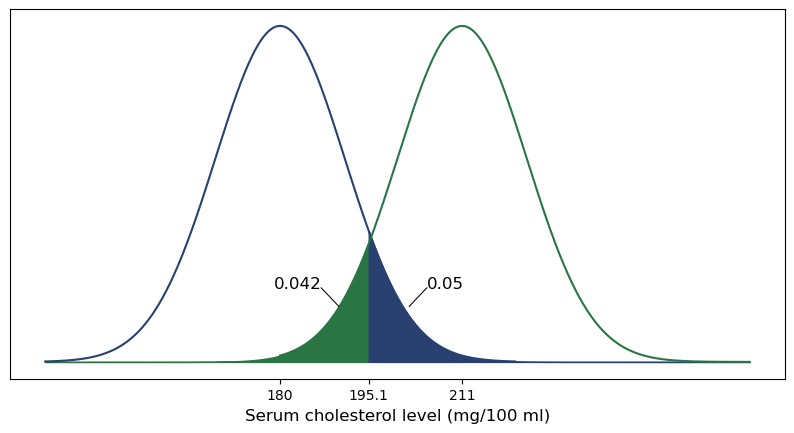

In [56]:
# Example 6: Dual Plot Distribution of Means of Samples

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm      # normal distribution 

# Define parameters for the normal distribution
mu_1 = 180        # mean
mu_2 = 211
sd = 11          # standard deviation

# Define limits of the area to be colored
low_val_1 = 195.1
high_val_1 = 260

low_val_2 = 140
high_val_2 = 195.1

# Define chart color
color_1 = '#294171'  # dark blue
color_2 = '#297544'  # dark green 

# Generate x-values between 140 and 220 with .01 steps. 
x_dat_1 = np.arange(140, 220, 0.01) 
x_dat_2 = np.arange(180, 260, 0.01) 

# Compute y-value for each x-value 
y_dat_1 = norm.pdf(x_dat_1, mu_1, sd)
y_dat_2 = norm.pdf(x_dat_2, mu_2, sd)

# Create plot environment
fig, ax = plt.subplots()
fig.set_figwidth(10)  # Width is 12 inches

# Plot normal distribution
ax.plot(x_dat_1, y_dat_1, color_1)
ax.plot(x_dat_2, y_dat_2, color_2)

# Label plot
plt.xlabel('Serum cholesterol level (mg/100 ml)', fontsize='12')   # X-axis
plt.ylabel('', fontsize='12')   # Y-axis

# Fill the left area under the curve between lower and upper limits
shade_x = np.linspace(low_val_2, high_val_2, 100)  # set x area
shade_y = norm.pdf(shade_x, mu_2, sd)            # set y area
plt.fill_between(shade_x, shade_y, color=color_2, alpha=1.0)  # fill areas

# Fill the right area under the curve between lower and upper limits
shade_x = np.linspace(low_val_1, high_val_1, 100)  # set x area
shade_y = norm.pdf(shade_x, mu_1, sd)            # set y area
plt.fill_between(shade_x, shade_y, color=color_1, alpha=1.0)  # fill areas

# Ensure y-axis is not visible
plt.gca().yaxis.set_visible(False)

# Specify x-ticks
ax.set_xticks([180, 195.1, 211])
ax.set_xticklabels(['180', '195.1', '211'])

# Plot text
plt.text(179, 0.008, '0.042', fontsize=12)   # text left
plt.text(205, 0.008, '0.05', fontsize=12)    # text right

# Plot line left
x_line=[187, 190]
y_line=[0.008, 0.006]
plt.plot(x_line, y_line, color='k', linestyle='solid', linewidth=0.75)

# Plot line Right
x_line=[205, 202]
y_line=[0.008, 0.006]
plt.plot(x_line, y_line, color='k', linestyle='solid', linewidth=0.75)

# Show plot
plt.show()

If the code is correct, you should see the following plot:

![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_2_image06.png)

**FIGURE 10.2**  Distributions of means of samples of size 25 for the serum cholesterol levels of males 20 to 74 years of age, $\mu$ = 180 mg/100 ml versus $\mu$ = 211 mg/100 ml 


#### **Changing the Power of the Test**

The topic **_Power_** will be discussed in the next section. However, for **Exercise 6** you are asked to plot what happens when you change the power of the hypothesis test shown above in **Figure 10.2**.

Investigators generally try to design tests of hypotheses so that they have high power. It is not enough to know that we have a small probability of rejecting $H_0$ when it is true; we would also like there to be a large probability of rejecting the null hypothesis when it is false. In most practical applications, a power less than 80% is considered insufficient. 

One way to increase the power of a test is to raise the significance level α. If we increase α, then we cut off a smaller portion of the tail of the sampling distribution centered at $µ_1$. Correspondingly, $\beta$ becomes smaller, and the power, 1 − $\beta$, increases. If α had been equal to 0.10 for the test of the null hypothesis

$$ H_0: \mu \leq 180 \text{ mg}/100 \text{ ml} $$ 

for instance, then $\beta$ would have been 0.018 and the power 0.982. This situation is illustrated in **Figure 10.4**; compare it to Figure 10.2, where $\alpha$ was equal to 0.05.

![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_2_image10.png)

**FIGURE 10.4**
Distributions of means of samples of size 25 for the serum cholesterol levels of males 20 to 74 years  of age, $\mu$ = 180 mg/100 ml versus $\mu$ = 211 mg/100 ml 

### **Exercise 6: Dual Plot Distribution of Means of Samples**

In the cell below use Python to recreate **Figure 10.4** shown above. 

**HINTS:** For the most part you can simply resuse the code in Example 6 as is. The major change you will need to make is that the x-value at the critical point is now `191.8` instead of the value of `195.1`. The textbook doesn't mention this value in the text, but it's clearly visible in **Figure 10.4**. You will also have to fiddle with the location of the left text ("0.018") and the line that connects it to curve. For the right text, just change the number from `0.05` to read `0.10`. The location of the right text, as well as the location of the line connecting it to the graph stays the same.

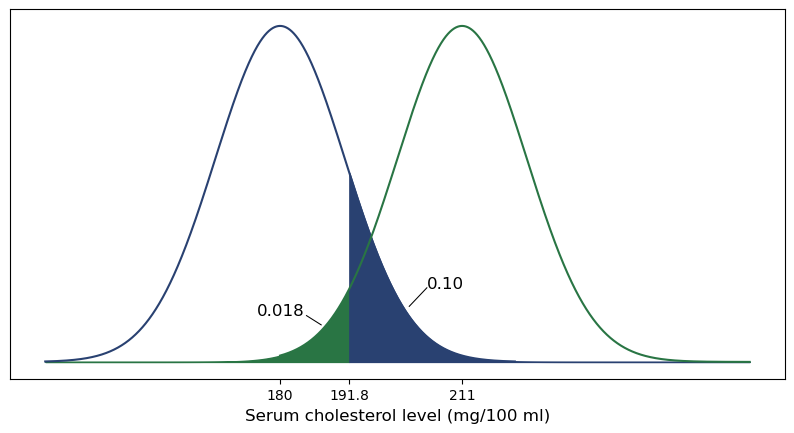

In [58]:
# Insert your code for Exercise 6 here

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm      # normal distribution 

# Define parameters for the normal distribution
mu_1 = 180        # mean
mu_2 = 211
sd = 11          # standard deviation

# Define limits of the area to be colored
low_val_1 = 191.8
high_val_1 = 260

low_val_2 = 140
high_val_2 = 191.8

# Define chart color
color_1 = '#294171'  # dark blue
color_2 = '#297544'  # dark green 

# Generate x-values between 140 and 220 with .01 steps. 
x_dat_1 = np.arange(140, 220, 0.01) 
x_dat_2 = np.arange(180, 260, 0.01) 

# Compute y-value for each x-value 
y_dat_1 = norm.pdf(x_dat_1, mu_1, sd)
y_dat_2 = norm.pdf(x_dat_2, mu_2, sd)

# Create plot environment
fig, ax = plt.subplots()
fig.set_figwidth(10)  # Width is 12 inches

# Plot normal distribution
ax.plot(x_dat_1, y_dat_1, color_1)
ax.plot(x_dat_2, y_dat_2, color_2)

# Label plot
plt.xlabel('Serum cholesterol level (mg/100 ml)', fontsize='12')   # X-axis
plt.ylabel('', fontsize='12')   # Y-axis

# Fill the left area under the curve between lower and upper limits
shade_x = np.linspace(low_val_2, high_val_2, 100)  # set x area
shade_y = norm.pdf(shade_x, mu_2, sd)            # set y area
plt.fill_between(shade_x, shade_y, color=color_2, alpha=1.0)  # fill areas

# Fill the right area under the curve between lower and upper limits
shade_x = np.linspace(low_val_1, high_val_1, 100)  # set x area
shade_y = norm.pdf(shade_x, mu_1, sd)            # set y area
plt.fill_between(shade_x, shade_y, color=color_1, alpha=1.0)  # fill areas

# Ensure y-axis is not visible
plt.gca().yaxis.set_visible(False)

# Specify x-ticks
ax.set_xticks([180, 191.8, 211])
ax.set_xticklabels(['180', '191.8', '211'])

# Plot text
plt.text(176, 0.005, '0.018', fontsize=12)   # text left
plt.text(205, 0.008, '0.10', fontsize=12)    # text right

# Plot line left
x_line=[184.5, 187.0]
y_line=[0.005, 0.004]
plt.plot(x_line, y_line, color='k', linestyle='solid', linewidth=0.75)

# Plot line Right
x_line=[205, 202]
y_line=[0.008, 0.006]
plt.plot(x_line, y_line, color='k', linestyle='solid', linewidth=0.75)

# Show plot
plt.show()

If your code is correct, you should see the following plot:

![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_2_image11.png)


### **Summary of Types of Errors**

![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_2_image09.png)

### Example 7: Compute Power

The Python code in the cell below can be used to compute the critical value, the power and the coeffient $\beta$ for an alternative hypothesis $ \mu_1$ compared to a null hypothesis $\mu$. This code example is more straightforward for practical applications than that illustated in your textbook on page 238.

In [98]:
# Example 7: Compute Power

import scipy.stats as stats
import numpy as np

# Define parameters
n = 25  # Sample size
alpha = 0.05  # Significance level
mu0 = 180  # Null hypothesis mean
mu_alt = 211  # Alternative hypothesis mean
sigma = 46  # Population standard deviation

# Calculate the critical value for a one-tailed test
z_alpha = stats.norm.ppf(1 - alpha)

# Calculate the non-rejection region
critical_value = mu0 + z_alpha * (sigma / np.sqrt(n))

# Calculate the power of the test
z_beta = (critical_value - mu_alt) / (sigma / np.sqrt(n))
beta = stats.norm.cdf(z_beta)

# Calculate power
power = 1 - beta

print("----Calculate Power---------------------------------")
print(f"Critical value: {critical_value:.1f}")
print(f"Alpha: {alpha:.2f}")
print(f"Z value: {z_beta:.4f}")
print(f"Beta: {beta:.3f}")
print(f"Power: {power:.4f}")

----Calculate Power---------------------------------
Critical value: 195.1
Alpha: 0.05
Z value: -1.7247
Beta: 0.042
Power: 0.9577


If the code is correct, you should see the following output:

~~~text
----Calculate Power---------------------------------
Critical value: 195.1
Alpha: 0.05
Z value: -1.7247
Beta: 0.042
Power: 0.9577
~~~

### **Exercise 7A: Compute Power**

In the cell below compute the power values for the same parameters used in Example 7, but change the alternative mean value to 180.

In [99]:
# Insert your code for Exercise 7A here

import scipy.stats as stats
import numpy as np

# Define parameters
n = 25  # Sample size
alpha = 0.05  # Significance level
mu0 = 180  # Null hypothesis mean
mu_alt = 180  # Alternative hypothesis mean
sigma = 46  # Population standard deviation

# Calculate the critical value for a one-tailed test
z_alpha = stats.norm.ppf(1 - alpha)

# Calculate the non-rejection region
critical_value = mu0 + z_alpha * (sigma / np.sqrt(n))

# Calculate the power of the test
z_beta = (critical_value - mu_alt) / (sigma / np.sqrt(n))
beta = stats.norm.cdf(z_beta)

# Calculate power
power = 1 - beta

print("----Calculate Power---------------------------------")
print(f"Critical value: {critical_value:.1f}")
print(f"Alpha: {alpha:.2f}")
print(f"Z value: {z_beta:.4f}")
print(f"Beta: {beta:.3f}")
print(f"Power: {power:.4f}")


----Calculate Power---------------------------------
Critical value: 195.1
Alpha: 0.05
Z value: 1.6449
Beta: 0.950
Power: 0.0500


If the code is correct, you should see the following output:

~~~text
----Calculate Power---------------------------------
Critical value: 195.1
Alpha: 0.05
Z value: 1.6449
Beta: 0.950
Power: 0.0500
~~~

These are the same values shown in your textbook at the bottom of page 238.

### **Exercise 7B: Compute Power**

In the cell below compute the power for the following parameters:

~~~text
# Define parameters
n = 25  # Sample size
alpha = 0.10  # Significance level
mu0 = 180  # Null hypothesis mean
mu_alt = 211  # Alternative hypothesis mean
sigma = 46  # Population standard deviation

~~~

In [102]:
# Insert your code for Exercise 7B here

import scipy.stats as stats
import numpy as np

# Define parameters
n = 25  # Sample size
alpha = 0.10  # Significance level
mu0 = 180  # Null hypothesis mean
mu_alt = 211  # Alternative hypothesis mean
sigma = 46  # Population standard deviation

# Calculate the critical value for a one-tailed test
z_alpha = stats.norm.ppf(1 - alpha)

# Calculate the non-rejection region
critical_value = mu0 + z_alpha * (sigma / np.sqrt(n))

# Calculate the power of the test
z_beta = (critical_value - mu_alt) / (sigma / np.sqrt(n))
beta = stats.norm.cdf(z_beta)

# Calculate power
power = 1 - beta

print("----Calculate Power---------------------------------")
print(f"Critical value: {critical_value:.1f}")
print(f"Alpha: {alpha:.2f}")
print(f"Z value: {z_beta:.4f}")
print(f"Beta: {beta:.3f}")
print(f"Power: {power:.4f}")


----Calculate Power---------------------------------
Critical value: 191.8
Alpha: 0.10
Z value: -2.0880
Beta: 0.018
Power: 0.9816


If the code is correct, you should see the following output:

~~~text
----Calculate Power---------------------------------
Critical value: 191.8
Alpha: 0.10
Z value: -2.0880
Beta: 0.018
Power: 0.9816
~~~

You would have used the critical value = 191.8 and $\beta$ = 0.018 in your **Exercise 6** above.

## **Power**

If $\beta$ is the probability of committing a type II error, then 1 − $\beta$ is called the **_power_** of the test of hypothesis. The power is the probability of rejecting the null hypothesis when $H_0$ is false. In other words, it is the probability of avoiding a _type II error_;  

$$ power = P(\text{reject} H_0 \mid H_0 \text{ is false)}. $$ 

The power may also be thought of as the likelihood that a particular study will detect a deviation from the null hypothesis given that one exists. Like $\beta$, the power must be computed for a particular alternative population mean $µ_1$. In the serum cholesterol example, the power of the one-sided test of hypothesis is  

$$ 1 − \beta = 1 − 0.042 = 0.958. $$

Consequently, for a test conducted at the 0.05 level of significance and using a sample of size 25, there is a 95.8% chance of rejecting the null hypothesis  

$$ H_0: µ ≤ 180 \text{ mg} \ /100 \text{ ml} $$ 

given that $H_0$ is false and the true population mean is $µ_1$ = 211 mg/100 ml. 

![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_2_image08.png)

**FIGURE 10.3** Power curve for $µ_0$ = 180, α = 0.05, and n = 25 

### Example 7: Plot Power Curve

The code in the cell below shows how to recreate **Figure 10.3** using Python.

_Code Description:_

The code uses the following `for loop` to compute different values for the alternative hypothesis `mu_alt` which are stored in the variable `power` using this code chunk:

~~~text
# Calculate power for each alternative mean
power = []
for mu_alt in mu_alt_range:
    z = (mu_alt - mu0) / (sigma / np.sqrt(n))
    beta = norm.cdf(z_alpha - z)
    power.append(1 - beta)
~~~

What is plotted is the variable `mu_alt_range` which are the x-values, and `power` which are the y-values.

~~~text
# Plot power curve
plt.plot(mu_alt_range, power, color=color_1, linewidth=3)
~~~

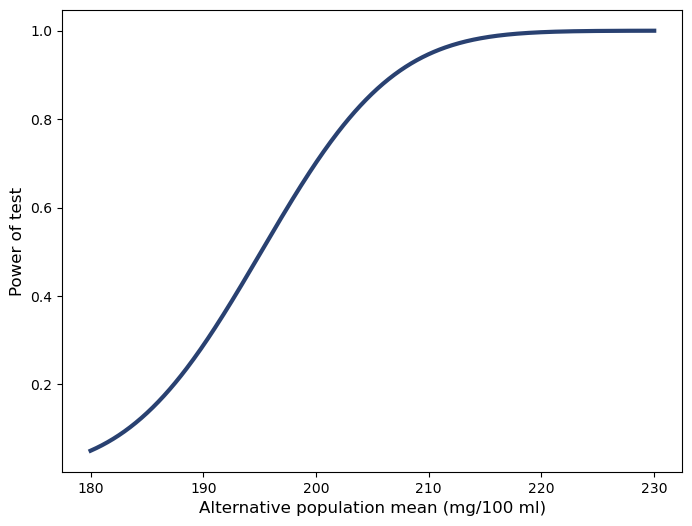

In [64]:
# Example 7: Plot Power Curve

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set color values
color_1='#294171'

# Parameters
mu0 = 180     # population mean
alpha = 0.05  # alpha
n = 25        # Sample size
sigma = 46    # Standard deviation

# Critical value for the given alpha
z_alpha = norm.ppf(1 - alpha)

# Range of alternative hypothesis means
mu_alt_range = np.linspace(180, 230, 400)

# Calculate power for each alternative mean
power = []
for mu_alt in mu_alt_range:
    z = (mu_alt - mu0) / (sigma / np.sqrt(n))
    beta = norm.cdf(z_alpha - z)
    power.append(1 - beta)

# Adjust plot size
plt.figure(figsize=(8, 6))

# Plot power curve
plt.plot(mu_alt_range, power, color=color_1, linewidth=3)

# Add labels
plt.xlabel('Alternative population mean (mg/100 ml)', fontsize=12)
plt.ylabel('Power of test',fontsize=12)

# Set grid off
plt.grid(False)

# Show plot
plt.show()


If the code is correct, you should see the following plot:

![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_2_image12.png)


The quantity 1 − β would have assumed a different value if we had set $µ_1$ equal to 200 mg/100 ml, and yet another value if we had let $µ_1$ be 220 mg/100 ml. 

If we were to plot the values of 1 − β  against all possible alternative population means, we would end up with what is known as a **_power curve_**. A power curve for the test of the null hypothesis  

$$ H0: µ ≤ 180 mg/100 ml  $$

is shown in the figure above. Note that when alternative population mean $µ_1$ = 180,  
![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_2_image13.png)

The power of the test approaches `1` as the alternative mean moves farther and farther away from the null value of 180 mg/100 ml. 

### **Exercise 7: Plot Power Curve**

The code in the cell below shows how to recreate **Figure 10.3** using Python.

_Code Description:_

The code uses the following `for loop` to compute different values for the alternative hypothesis `mu_alt` which are stored in the variable `power` using this code chunk:

~~~text
# Calculate power for each alternative mean
power = []
for mu_alt in mu_alt_range:
    z = (mu_alt - mu0) / (sigma / np.sqrt(n))
    beta = norm.cdf(z_alpha - z)
    power.append(1 - beta)
~~~

What is plotted is the variable `mu_alt_range` which are the x-values, and `power` which are the y-values.

~~~text
# Plot power curve
plt.plot(mu_alt_range, power, color=color_1, linewidth=3)
~~~

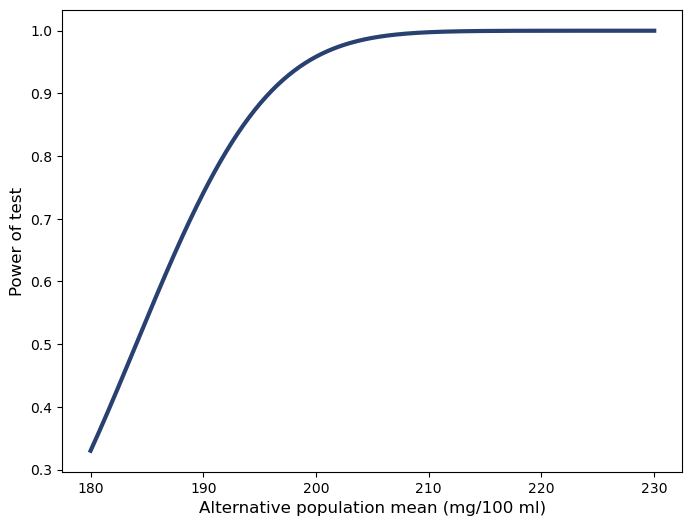

In [66]:
# Insert your code for Exercise 7 here

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set color values
color_1='#294171'

# Parameters
mu0 = 180     # population mean
alpha = 0.33  # alpha
n = 25        # Sample size
sigma = 46    # Standard deviation

# Critical value for the given alpha
z_alpha = norm.ppf(1 - alpha)

# Range of alternative hypothesis means
mu_alt_range = np.linspace(180, 230, 400)

# Calculate power for each alternative mean
power = []
for mu_alt in mu_alt_range:
    z = (mu_alt - mu0) / (sigma / np.sqrt(n))
    beta = norm.cdf(z_alpha - z)
    power.append(1 - beta)

# Adjust plot size
plt.figure(figsize=(8, 6))

# Plot power curve
plt.plot(mu_alt_range, power, color=color_1, linewidth=3)

# Add labels
plt.xlabel('Alternative population mean (mg/100 ml)', fontsize=12)
plt.ylabel('Power of test',fontsize=12)

# Set grid off
plt.grid(False)

# Show plot
plt.show()


If the code is correct, you should see the following plot:

![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_2_image14.png)


The quantity 1 − β would have assumed a different value if we had set $µ_1$ equal to 200 mg/100 ml, and yet another value if we had let $µ_1$ be 220 mg/100 ml. 

If we were to plot the values of 1 − β  against all possible alternative population means, we would end up with what is known as a **_power curve_**. A power curve for the test of the null hypothesis  

$$ H0: µ ≤ 180 mg/100 ml  $$

is shown in the figure above. Note that when alternative population mean $µ_1$ = 180,  
![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_2_image13.png)

The power of the test approaches `1` as the alternative mean moves farther and farther away from the null value of 180 mg/100 ml. 

## **Lesson Turn-in**

When you have run all of the code cells in sequential order (the last code cell above should be 19) you need to create a PDF of your notebook. 

Upload the **_PDF_** of your Lesson_03_1 assignment to Canvas for grading.
